In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Read in csv
bgame_df = pd.read_csv('test_this_is_it.csv', delimiter=',')

# Display the first few rows
print(bgame_df.head())

                                Name  Min Players  Max Players  Play Time  \
0                         Gloomhaven            1            4        120   
1          Pandemic Legacy: Season 1            2            4         60   
2                  Brass: Birmingham            2            4        120   
3                  Terraforming Mars            1            5        120   
4  Twilight Imperium: Fourth Edition            3            6        480   

   Min Age  Users Rated  Rating Average  Complexity Average  Owned Users  \
0       14        42055            8.79                3.86        68323   
1       13        41643            8.61                2.84        65294   
2       14        19217            8.66                3.91        28785   
3       12        64864            8.43                3.24        87099   
4       14        13468            8.70                4.22        16831   

          Domain1  above_average  Bayesian Average Most Notable Genre  \
0  Stra

In [3]:
len(bgame_df)

21186

In [4]:
bgame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21186 entries, 0 to 21185
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   21186 non-null  object 
 1   Min Players            21186 non-null  int64  
 2   Max Players            21186 non-null  int64  
 3   Play Time              21186 non-null  int64  
 4   Min Age                21186 non-null  int64  
 5   Users Rated            21186 non-null  int64  
 6   Rating Average         21186 non-null  float64
 7   Complexity Average     21186 non-null  float64
 8   Owned Users            21186 non-null  int64  
 9   Domain1                21186 non-null  object 
 10  above_average          21186 non-null  bool   
 11  Bayesian Average       21186 non-null  float64
 12  Most Notable Genre     21186 non-null  object 
 13  Most Notable Mechanic  21186 non-null  object 
 14  Price                  21186 non-null  float64
 15  pc

In [5]:
bgame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21186 entries, 0 to 21185
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   21186 non-null  object 
 1   Min Players            21186 non-null  int64  
 2   Max Players            21186 non-null  int64  
 3   Play Time              21186 non-null  int64  
 4   Min Age                21186 non-null  int64  
 5   Users Rated            21186 non-null  int64  
 6   Rating Average         21186 non-null  float64
 7   Complexity Average     21186 non-null  float64
 8   Owned Users            21186 non-null  int64  
 9   Domain1                21186 non-null  object 
 10  above_average          21186 non-null  bool   
 11  Bayesian Average       21186 non-null  float64
 12  Most Notable Genre     21186 non-null  object 
 13  Most Notable Mechanic  21186 non-null  object 
 14  Price                  21186 non-null  float64
 15  pc

In [6]:
unique_domain = bgame_df['Domain1'].unique()
print(unique_domain)

['Strategy Games' 'Thematic Games' 'Family Games' 'Customizable Games'
 'Abstract Games' 'Party Games' 'Wargames' "Children's Games" 'other']


In [7]:
unique_genre = bgame_df['Most Notable Genre'].unique()
print(unique_genre)

['Adventure' 'Environmental' 'Age of Reason' 'Economic' 'Civilization'
 'Card Game' 'Civil War' 'Modern Warfare' 'American West' 'Fantasy' 'Dice'
 'Ancient' 'Animals' 'Medieval' 'City Building' 'Abstract Strategy'
 'Bluffing' 'Action / Dexterity' 'Arabian' 'Industry / Manufacturing'
 'Renaissance' 'Deduction' 'Medical' 'Science Fiction' 'Aviation / Flight'
 'Exploration' 'Trains' 'Post-Napoleonic' 'Miniatures' 'Wargame'
 'Party Game' 'Movies / TV / Radio theme' 'Horror' 'Real-time' 'Racing'
 'unspecified' 'Humor' 'Maze' 'Spies/Secret Agents'
 'Collectible Components' 'Nautical' 'Fighting' 'Prehistoric'
 'Educational' 'Math' 'Travel' 'Mythology' 'Negotiation' 'Political'
 "Children's Game" 'Napoleonic' 'Farming' 'Transportation'
 'Territory Building' 'American Civil War' 'Parsing Error'
 'American Indian Wars' 'Comic Book / Strip' 'Mafia' 'Electronic'
 'Not available' 'Puzzle' 'Murder/Mystery' 'Novel-based' 'Sports'
 'Korean War' 'Print & Play' 'Book' 'American Revolutionary War'
 'Reli

In [8]:
# Group by 'Domain1' and aggregate 'Most Notable Genre'
grouped_genres = bgame_df.groupby('Domain1')['Most Notable Genre'].unique()

# Create a DataFrame from the grouped genres
grouped_genres_df = grouped_genres.reset_index()

# Add a new column 'Total Genres' which is length of each unique genre list
grouped_genres_df['Total Genres'] = grouped_genres_df['Most Notable Genre'].apply(len)

# Print the result
grouped_genres_df

,Domain1,Most Notable Genre,Total Genres
0,Abstract Games,"[Abstract Strategy, Dice, unspecified, Card Ga...",33
1,Children's Games,"[Children's Game, Action / Dexterity, Adventur...",24
2,Customizable Games,"[Adventure, Card Game, Bluffing, Aviation / Fl...",16
3,Family Games,"[Animals, Card Game, Ancient, Adventure, Medie...",69
4,Party Games,"[Card Game, Deduction, Bluffing, Party Game, u...",36
5,Strategy Games,"[Adventure, Environmental, Age of Reason, Econ...",66
6,Thematic Games,"[Civil War, Fantasy, Adventure, Bluffing, Dedu...",53
7,Wargames,"[Miniatures, Ancient, Wargame, Civil War, unsp...",54
8,other,"[Dice, Card Game, Deduction, Animals, Ancient,...",81


In [9]:
unique_mechanic = bgame_df['Most Notable Mechanic'].unique()
print(unique_mechanic)

['Action Queue' 'Action Points' 'Hand Management' 'Closed Drafting'
 'Action Drafting' 'End Game Bonuses' 'Area Majority / Influence'
 'Action/Event' 'Deck, Bag, and Pool Building' 'Action Retrieval'
 'Dice Rolling' 'Automatic Resource Growth' 'Contracts'
 'Campaign / Battle Card Driven' 'Card Play Conflict Resolution'
 'Delayed Purchase' 'Area Movement' 'Cooperative Game'
 'Auction: Turn Order Until Pass' 'Bias' 'Communication Limits'
 'Commodity Speculation' 'Follow' 'Catch the Leader' 'Flicking'
 'Auction/Bidding' 'Chit-Pull System' 'Auction: Fixed Placement'
 'Enclosure' 'Grid Coverage' 'Bingo' 'Connections' 'Finale Ending'
 'Advantage Token' 'Alliances' 'Increase Value of Unchosen Resources'
 'Auction: Dutch' 'Events' 'Betting and Bluffing' 'Grid Movement'
 'Auction: Once Around' 'Hidden Roles' 'unspecified' 'Acting' 'Investment'
 'Open Drafting' 'Pattern Recognition' 'Hexagon Grid' 'Order Counters'
 'Critical Hits and Failures' 'Race' 'Deduction' 'Chaining'
 'Point to Point Movem

In [10]:
# Group by 'Domain1' and aggregate 'Most Notable Genre'
grouped_mechanics = bgame_df.groupby('Domain1')['Most Notable Mechanic'].unique()

# Convert to DataFrame
grouped_mechanics_df = grouped_mechanics.reset_index()

# Add a new column 'Total Mechanics' which is length of each unique genre list
grouped_mechanics_df['Total Mechanics'] = grouped_mechanics_df['Most Notable Mechanic'].apply(len)


# Print the result
grouped_mechanics_df

,Domain1,Most Notable Mechanic,Total Mechanics
0,Abstract Games,"[End Game Bonuses, Grid Coverage, Contracts, G...",70
1,Children's Games,"[Area Movement, Dice Rolling, Hand Management,...",60
2,Customizable Games,"[Action Points, Card Play Conflict Resolution,...",33
3,Family Games,"[Action Queue, Contracts, Communication Limits...",110
4,Party Games,"[Communication Limits, Finale Ending, Grid Mov...",65
5,Strategy Games,"[Action Queue, Action Points, Hand Management,...",101
6,Thematic Games,"[Area Majority / Influence, Action Drafting, C...",53
7,Wargames,"[Area Majority / Influence, Campaign / Battle ...",47
8,other,"[Dice Rolling, Area Majority / Influence, Coop...",140


In [11]:
domain_stats = bgame_df.groupby('Domain1').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Rating Average', ascending=False)

# Display the result
print(domain_stats)

                    Rating Average  Owned Users  Users Rated
Domain1                                                     
Strategy Games            7.016202      8167381      5735020
Wargames                  6.843467      1811601       698405
Thematic Games            6.837848      3320681      1908579
Family Games              6.420731      8680865      5515191
Customizable Games        6.363133       667345       385216
Party Games               6.301907      2075570      1221256
Abstract Games            6.212614      1546105       993017
other                     6.206286      3422595      1371030
Children's Games          5.508380       625949       344035


In [12]:
domain_stats = bgame_df.groupby('Domain1').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Owned Users', ascending=False)

# Display the result
print(domain_stats)

                    Rating Average  Owned Users  Users Rated
Domain1                                                     
Family Games              6.420731      8680865      5515191
Strategy Games            7.016202      8167381      5735020
other                     6.206286      3422595      1371030
Thematic Games            6.837848      3320681      1908579
Party Games               6.301907      2075570      1221256
Wargames                  6.843467      1811601       698405
Abstract Games            6.212614      1546105       993017
Customizable Games        6.363133       667345       385216
Children's Games          5.508380       625949       344035


In [13]:
genre_stats = bgame_df.groupby('Most Notable Genre').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Rating Average', ascending=False)

# Display the result
print(genre_stats)

                            Rating Average  Owned Users  Users Rated
Most Notable Genre                                                  
Expansion for Base-game           7.461111         3111          562
unspecified                       7.445398      3492872      2422607
Book                              7.426804        33704        12464
Miniatures                        7.160645       155063        78463
American Revolutionary War        7.157500         5549         2021
...                                    ...          ...          ...
Movies / TV / Radio theme         5.717170       140702        59831
Zombies                           5.652000         4462         1872
Children's Game                   5.580539       437831       226242
Mature / Adult                    5.451000         9235         3656
Trivia                            5.413548        15977         6346

[84 rows x 3 columns]


In [14]:
genre_stats = bgame_df.groupby('Most Notable Genre').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Owned Users', ascending=False)

# Display the result
print(genre_stats)

                         Rating Average  Owned Users  Users Rated
Most Notable Genre                                               
Card Game                      6.271851      5614132      3059194
unspecified                    7.445398      3492872      2422607
Adventure                      6.541520      2382009      1334601
Bluffing                       6.406719      1942158      1214343
Abstract Strategy              6.284835      1702808      1054459
...                                 ...          ...          ...
Zombies                        5.652000         4462         1872
Space Exploration              6.860000         3813         1800
Religious                      5.748889         3800         2231
Expansion for Base-game        7.461111         3111          562
World War II                   6.517500          987          618

[84 rows x 3 columns]


In [15]:
mech_stats = bgame_df.groupby('Most Notable Mechanic').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Rating Average', ascending=False)

# Display the result
print(mech_stats)

                           Rating Average  Owned Users  Users Rated
Most Notable Mechanic                                              
Die Icon Resolution              7.723333          859          261
Automatic Resource Growth        7.647778       185282       147620
Finale Ending                    7.580000        38202        27134
Auction: Fixed Placement         7.540000        27843        21314
Measurement Movement             7.496667         1072          444
...                                   ...          ...          ...
Single Loser Game                5.323333         3042         1880
Passed Action Token              5.290000          550          264
Roll / Spin and Move             5.223913       215977        98319
Questions and Answers            5.100000         1509          455
Auction: English                 4.680000        41300        29277

[161 rows x 3 columns]


In [16]:
mech_stats = bgame_df.groupby('Most Notable Mechanic').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Owned Users', ascending=False)

# Display the result
print(mech_stats)

                                          Rating Average  Owned Users  \
Most Notable Mechanic                                                   
unspecified                                     7.445398      3492872   
Dice Rolling                                    6.457033      3127042   
Hand Management                                 6.239318      2933646   
Area Majority / Influence                       6.762845      2438138   
Action Points                                   6.930839      2301863   
...                                                  ...          ...   
Worker Placement, Different Worker Types        6.540000          255   
Force Commitment                                5.990000          185   
Relative Movement                               5.380000          134   
Kill Steal                                      7.410000          127   
Resource to Move                                6.570000          127   

                                          Users Ra

In [17]:
def find_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Return outliers
    return group[(group < lower_bound) | (group > upper_bound)]

# Apply this function to each domain for both 'Rating Average' and 'Owned Users'
outliers_rating_avg = bgame_df.groupby('Domain1')['Rating Average'].apply(find_outliers)
outliers_owned_users = bgame_df.groupby('Domain1')['Owned Users'].apply(find_outliers)

# Calculate the number of outliers per domain
outliers_count_rating_avg = outliers_rating_avg.groupby('Domain1').count()
outliers_count_owned_users = outliers_owned_users.groupby('Domain1').count()

# Display the number of outliers per domain
print("Outliers in Rating Average per Domain:")
print(outliers_count_rating_avg)

print("\nOutliers in Owned Users per Domain:")
print(outliers_count_owned_users )


Outliers in Rating Average per Domain:
Domain1
Abstract Games         17
Children's Games        5
Customizable Games      7
Family Games           30
Party Games            10
Strategy Games         18
Thematic Games          5
Wargames               18
other                 201
Name: Rating Average, dtype: int64

Outliers in Owned Users per Domain:
Domain1
Abstract Games        162
Children's Games      102
Customizable Games     38
Family Games          247
Party Games            53
Strategy Games        198
Thematic Games         96
Wargames              290
other                 915
Name: Owned Users, dtype: int64


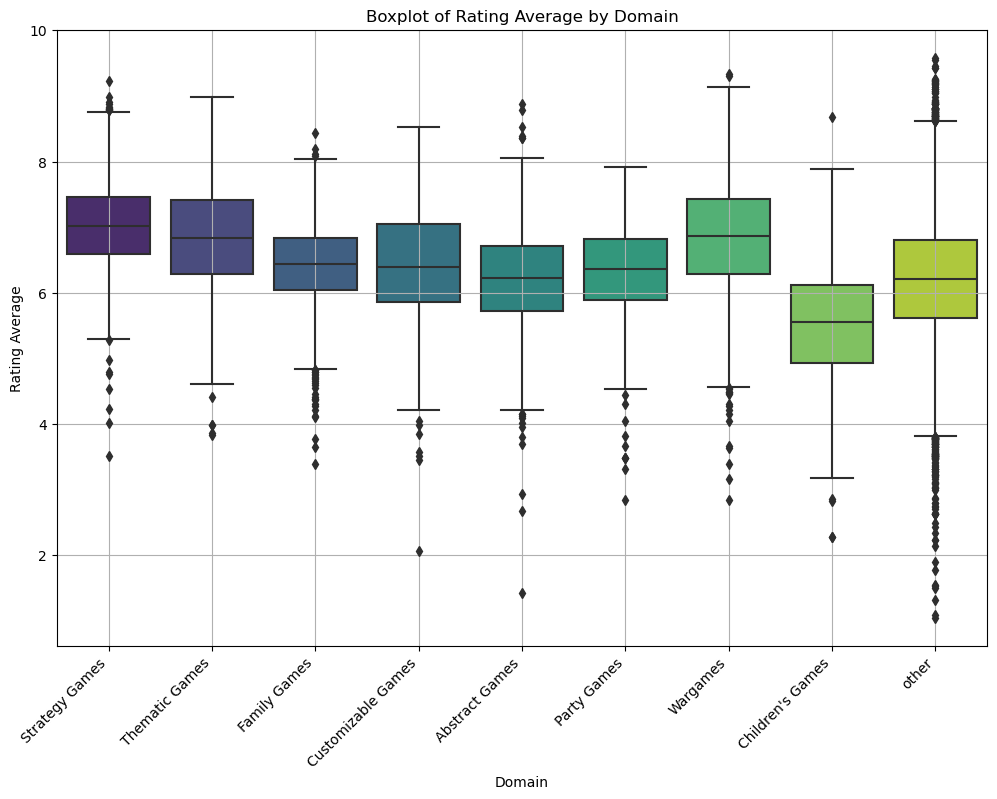

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Domain1', y='Rating Average', data=bgame_df, palette='viridis')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding title and labels
plt.title('Boxplot of Rating Average by Domain')
plt.xlabel('Domain')
plt.ylabel('Rating Average')
plt.grid(True)
plt.show()


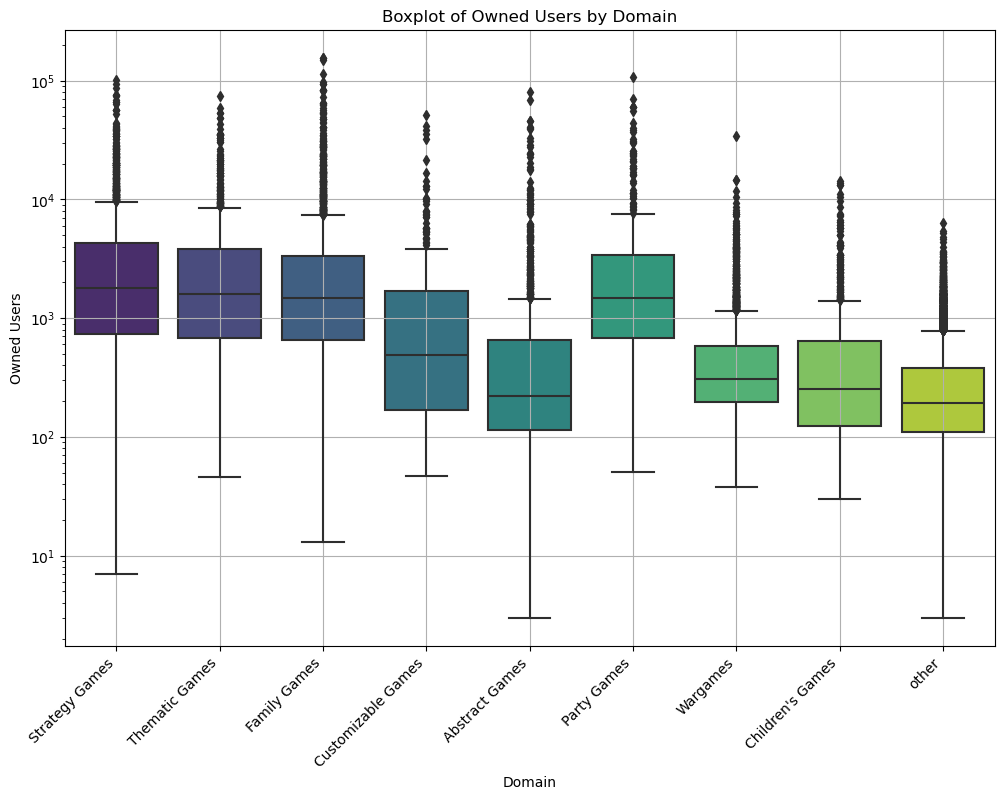

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Domain1', y='Owned Users', data=bgame_df, palette='viridis')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Boxplot of Owned Users by Domain')
plt.xlabel('Domain')
plt.ylabel('Owned Users')
plt.yscale('log')  # Use log scale if 'Owned Users' has a large range

plt.grid(True)
plt.show()

In [20]:
correlation = bgame_df['Rating Average'].corr(bgame_df['Owned Users'])
print(f"Correlation coefficient between Rating Average and Owned Users: {correlation}")


Correlation coefficient between Rating Average and Owned Users: 0.17748159374830577


In [30]:
def analyze_correlation(data, x_col, y_col, hue_col=None, palette='viridis', scatter_size=100, plot_title=None):
    """
    Analyzes the correlation between two columns in a DataFrame and performs significance testing.
    
    Parameters:
    - data: DataFrame containing the data
    - x_col: The name of the column to be used for the x-axis
    - y_col: The name of the column to be used for the y-axis
    - hue_col: The name of the column to be used for color coding (optional)
    - palette: Color palette for the scatter plot
    - scatter_size: Size of scatter plot markers
    - plot_title: Title for the plot
    
    Returns:
    - corr_coefficient: Pearson correlation coefficient
    - p_value: P-value for the significance test
    """
    
    # Scatter plot to visualize the correlation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette=palette, s=scatter_size)

    # Trend line to the scatter plot
    sns.regplot(data=data, x=x_col, y=y_col, scatter=False, color='blue')

    # Adding labels and title
    if plot_title:
        plt.title(plot_title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    if hue_col:
        plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Calculate the Pearson correlation coefficient and p-value
    corr_coefficient, p_value = pearsonr(data[x_col], data[y_col])

    # Display the results
    print(f"Pearson Correlation Coefficient: {corr_coefficient}")
    print(f"P-value: {p_value}")

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("The correlation is statistically significant.")
    else:
        print("The correlation is not statistically significant.")
    
    return corr_coefficient, p_value

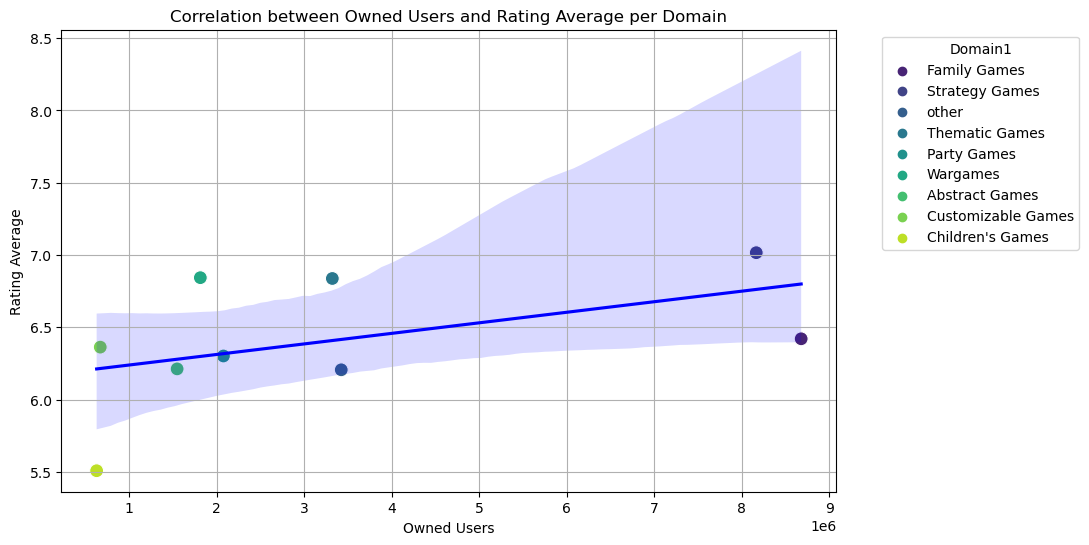

Pearson Correlation Coefficient: 0.4872484066599416
P-value: 0.1833941447675839
The correlation is not statistically significant.


(0.4872484066599416, 0.1833941447675839)

In [31]:
analyze_correlation(
    data=domain_stats, 
    x_col='Owned Users', 
    y_col='Rating Average', 
    hue_col='Domain1', 
    plot_title='Correlation between Owned Users and Rating Average per Domain'
)

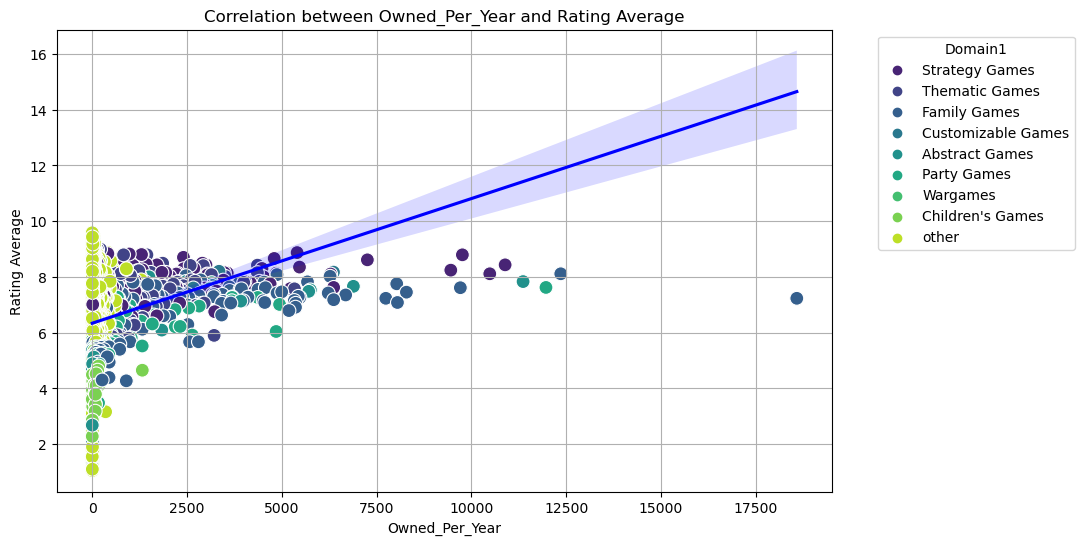

Pearson Correlation Coefficient: 0.22535314029955578
P-value: 4.326254842839904e-242
The correlation is statistically significant.


(0.22535314029955578, 4.326254842839904e-242)

In [32]:
analyze_correlation(
    data=bgame_df, 
    x_col='Owned_Per_Year', 
    y_col='Rating Average', 
    hue_col='Domain1', 
    plot_title='Correlation between Owned_Per_Year and Rating Average'
)

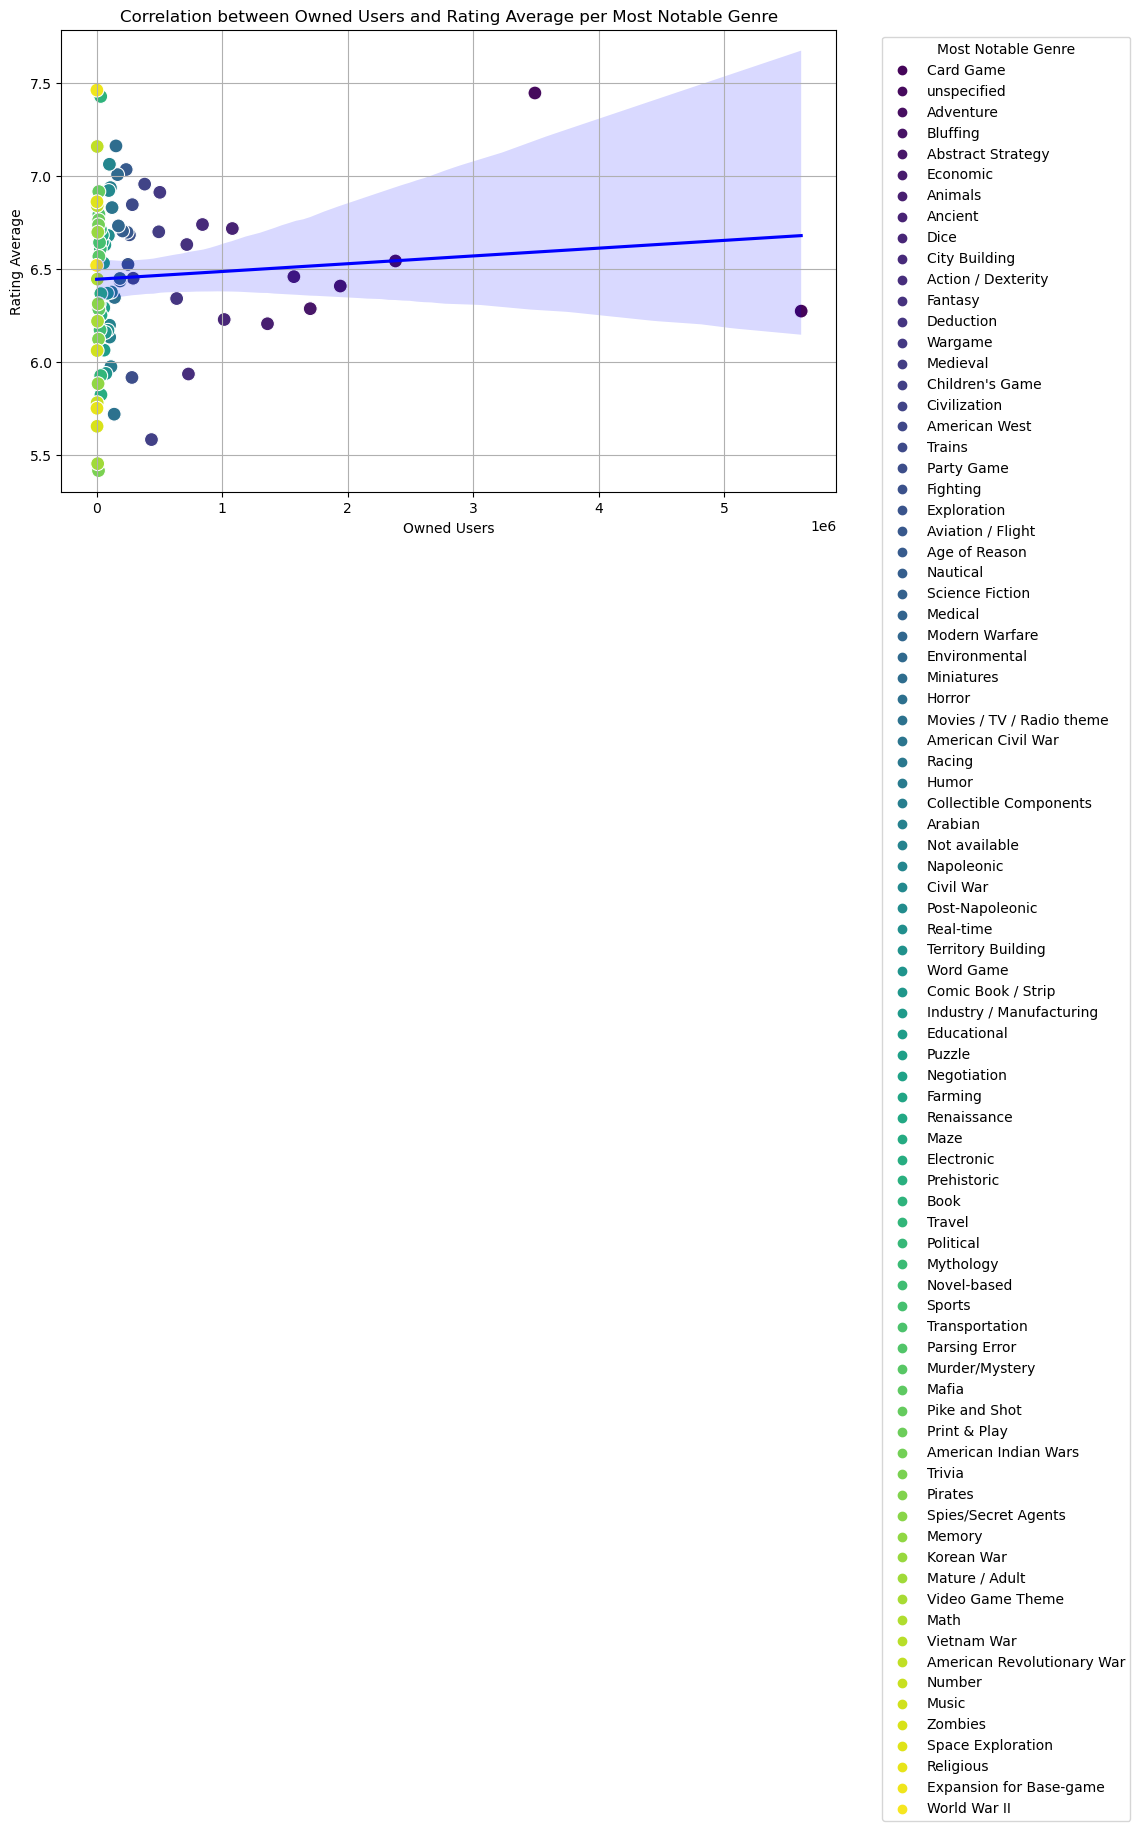

In [34]:
# Scatter plot to visualize the correlation between 'Owned Users' and 'Rating Average'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre_stats, x='Owned Users', y='Rating Average', hue='Most Notable Genre', palette='viridis', s=100)

# Trend line to the scatter plot
sns.regplot(data=genre_stats, x='Owned Users', y='Rating Average', scatter=False, color='blue')

# Adding labels and title
plt.title('Correlation between Owned Users and Rating Average per Most Notable Genre')
plt.xlabel('Owned Users')
plt.ylabel('Rating Average')
plt.legend(title='Most Notable Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

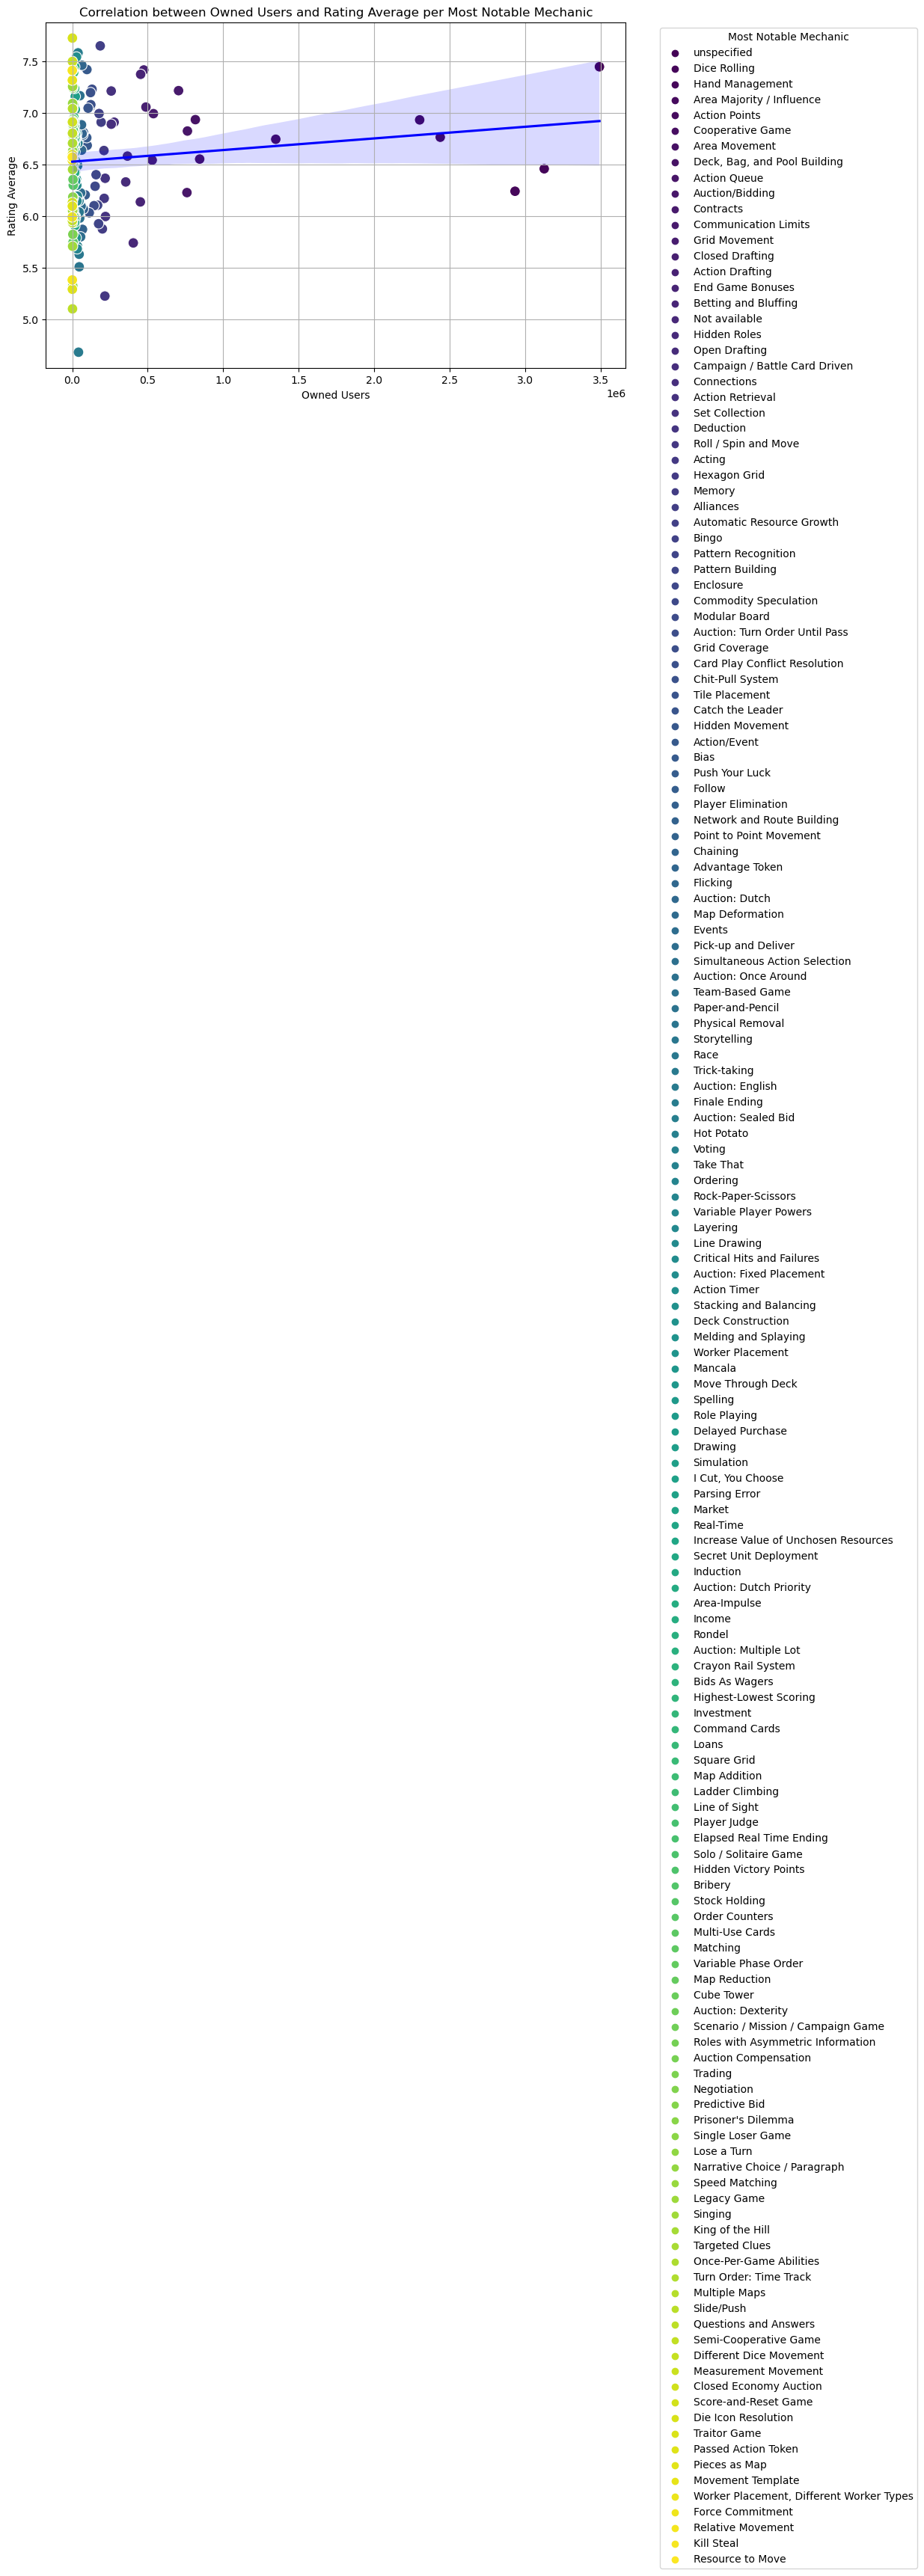

In [24]:
# Scatter plot to visualize the correlation between 'Owned Users' and 'Rating Average'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mech_stats, x='Owned Users', y='Rating Average', hue='Most Notable Mechanic', palette='viridis', s=100)

# Trend line to the scatter plot
sns.regplot(data=mech_stats, x='Owned Users', y='Rating Average', scatter=False, color='blue')

# Adding labels and title
plt.title('Correlation between Owned Users and Rating Average per Most Notable Mechanic')
plt.xlabel('Owned Users')
plt.ylabel('Rating Average')
plt.legend(title='Most Notable Mechanic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()